# Exam 1 Review - Higher Order Regression with n_Parameters

## GitHub Repo: https://github.com/sking115422/DS2_E1_Rev.git

## Ordinal

Oridinal Data - data that is classified in to categories that have a natural order or rank

Examples:
* Socio Economic Status: low income < middle income < high income
* Satisfaction Ratings: strong dislike < dislike < neutral < like < strong like

In [95]:
import pandas as pd

In [96]:
ord = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High", "Low", "Medium","High", "Low"]})
print(ord)

    Score
0     Low
1     Low
2  Medium
3  Medium
4    High
5     Low
6  Medium
7    High
8     Low


In [97]:
scale_mapper = {"Low":1, "Medium":2, "High":3}
ord["Scale"] = ord["Score"].replace(scale_mapper)

In [98]:
ord.sort_values('Scale')

,Score,Scale
0,Low,1
1,Low,1
5,Low,1
8,Low,1
2,Medium,2
3,Medium,2
6,Medium,2
4,High,3
7,High,3


## Categorical 

Categorical Data - A categorical variable (sometimes called a nominal variable) is one that has two or more categories

Examples:
* State: Georgia, Florida, Alabama, etc. 
* Binary Classification: Yes or No
* Eye Color: Brown, Green, Blue, etc. 

2 ways to handle this data: 

1. Dummy variables
1. One hot encoding 



### Example with Dummy Variables:

In [99]:
# For Example, imagine we have the following data set:

eye_color = pd.DataFrame({"eye_color": ["green", "blue", "blue", "brown", "brown", "green", "green","brown", "brown"]})
print(eye_color)

  eye_color
0     green
1      blue
2      blue
3     brown
4     brown
5     green
6     green
7     brown
8     brown


In [100]:
dummies = pd.get_dummies(eye_color.eye_color, prefix='')
dummies

,_blue,_brown,_green
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,1,0
8,0,1,0


### Example with One Hot Encoding

In [101]:
states = pd.DataFrame({"states": ["Georgia", "Alabama", "Florida", "Tennessee"]})

In [102]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder().fit_transform(states).toarray()
one_hot

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

## Quadratic Regression

Extension of simple linear regression by adding in X^2 terms

Allows us to fit non-linear relationships in data shaped like a parabola

![](quad.png)

With only on predictor variable the quadratic function would look like the following:

![](quad_eqn1.png)

However, if we expanded it out to 2 dimensions it would take the follow form:

![](quad_eqn2.png)

Another, option open to use is using cross terms. This allows us to capture relationships between the data. 

![](quad_eqn3.png)


### Example

In [103]:
# Auto MPG data set for reference since we are all familiar with it!

autompg = pd.read_csv("./auto_mpg_fixed_cleaned.csv", index_col=0)

In [104]:
autompg.head(3)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0


In [105]:
# Creating our input feature set and target variable

X_mpg = autompg[['cylinders', 'model_year', 'weight']]
y_mpg = autompg['mpg']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [108]:
# Create our input features for quadratic regression

quad_reg = PolynomialFeatures(degree=2, interaction_only=False)
X_quad = quad_reg.fit_transform(X_mpg)
X_quad = pd.DataFrame(X_quad, columns=quad_reg.get_feature_names())
model = linear_model.LinearRegression()
X_quad.apply(lambda col: col.reset_index(drop=True))
X_quad = X_quad.drop(columns = ["1"])
y_quad = y_mpg.reset_index(drop=True)
X_quad

/Users/sdk/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,8.0,70.0,3504.0,64.0,560.0,28032.0,4900.0,245280.0,12278016.0
1,8.0,70.0,3693.0,64.0,560.0,29544.0,4900.0,258510.0,13638249.0
2,8.0,70.0,3436.0,64.0,560.0,27488.0,4900.0,240520.0,11806096.0
3,8.0,70.0,3433.0,64.0,560.0,27464.0,4900.0,240310.0,11785489.0
4,8.0,70.0,3449.0,64.0,560.0,27592.0,4900.0,241430.0,11895601.0
...,...,...,...,...,...,...,...,...,...
387,4.0,82.0,2790.0,16.0,328.0,11160.0,6724.0,228780.0,7784100.0
388,4.0,82.0,2130.0,16.0,328.0,8520.0,6724.0,174660.0,4536900.0
389,4.0,82.0,2295.0,16.0,328.0,9180.0,6724.0,188190.0,5267025.0
390,4.0,82.0,2625.0,16.0,328.0,10500.0,6724.0,215250.0,6890625.0


In [109]:
# Creating train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_quad, y_mpg, test_size=0.20, random_state=1)

In [110]:
# Testing and training our model

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
import matplotlib.pyplot as plt

In [112]:
# Creating function to plot our results

def showFit(x_values, y_test, y_pred):
    plt.figure(figsize=(25, 10))
    plt.scatter(x_values, y_test, label="y_test", color="black")
    plt.scatter(x_values, y_pred, label="y_pred", color="blue")
    plt.legend()
    plt.show()

In [113]:
from sklearn.metrics import r2_score, mean_squared_error
import math

In [114]:
# Creating X_values to plot

x_values = range(0, len(X_test))

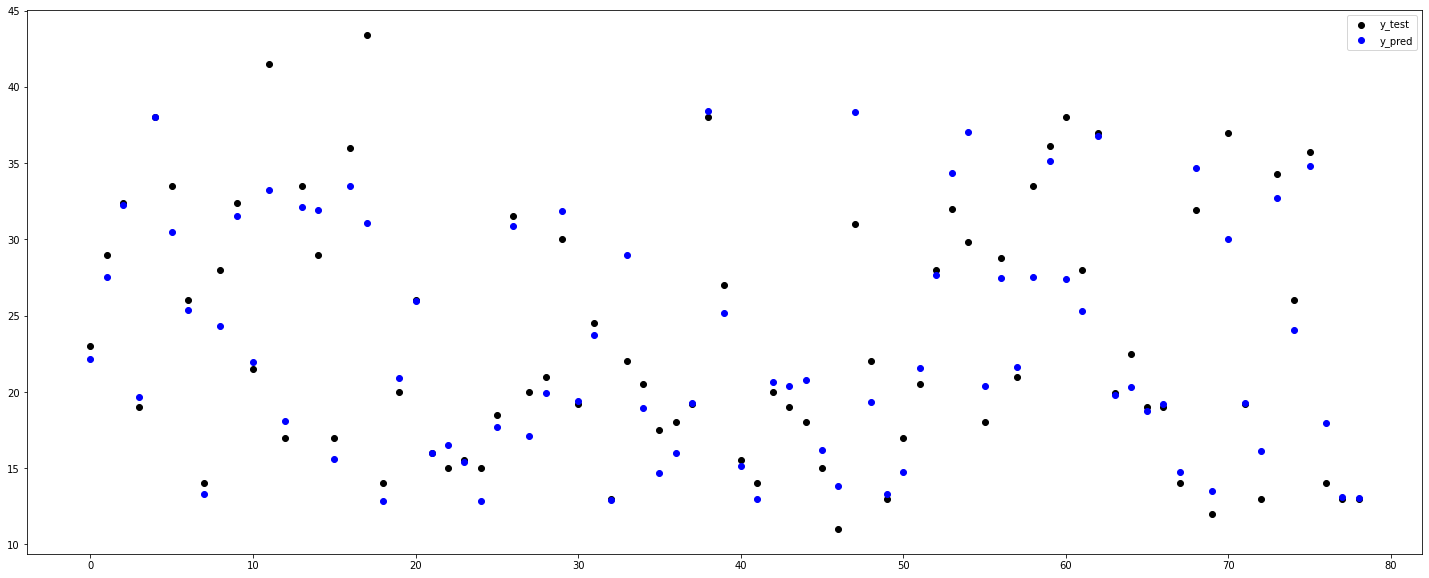

r2: 0.8600122678454759
MSE: 9.70426810373459
RMSE: 3.1151674278816204


In [115]:
# Create X values list and show fit!

showFit(x_values, y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print ("r2:", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print ("MSE:", mse)
print ("RMSE:", rmse)

## Cubic Regression

Similar idea to quadratic except now we go all the way up to cubic terms

example of data with cubic shape:

![](cub.png)

For 1 predictor:

![](cub_eqn1.png)

For 2 predictors:

![](cub_eqn2.png)

For cross terms:

![](cub_eqn3.png)

### Example

In [116]:

cub_reg = PolynomialFeatures(degree=3, interaction_only=False)
X_cub = cub_reg.fit_transform(X_mpg)
X_cub = pd.DataFrame(X_cub, columns=cub_reg.get_feature_names())
model = linear_model.LinearRegression()
X_cub.apply(lambda col: col.reset_index(drop=True))
X_cub = X_cub.drop(columns = ["1"])
y_cub = y_mpg.reset_index(drop=True)
X_cub

/Users/sdk/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2,x0^3,x0^2 x1,x0^2 x2,x0 x1^2,x0 x1 x2,x0 x2^2,x1^3,x1^2 x2,x1 x2^2,x2^3
0,8.0,70.0,3504.0,64.0,560.0,28032.0,4900.0,245280.0,12278016.0,512.0,4480.0,224256.0,39200.0,1962240.0,98224128.0,343000.0,17169600.0,859461120.0,4.302217e+10
1,8.0,70.0,3693.0,64.0,560.0,29544.0,4900.0,258510.0,13638249.0,512.0,4480.0,236352.0,39200.0,2068080.0,109105992.0,343000.0,18095700.0,954677430.0,5.036605e+10
2,8.0,70.0,3436.0,64.0,560.0,27488.0,4900.0,240520.0,11806096.0,512.0,4480.0,219904.0,39200.0,1924160.0,94448768.0,343000.0,16836400.0,826426720.0,4.056575e+10
3,8.0,70.0,3433.0,64.0,560.0,27464.0,4900.0,240310.0,11785489.0,512.0,4480.0,219712.0,39200.0,1922480.0,94283912.0,343000.0,16821700.0,824984230.0,4.045958e+10
4,8.0,70.0,3449.0,64.0,560.0,27592.0,4900.0,241430.0,11895601.0,512.0,4480.0,220736.0,39200.0,1931440.0,95164808.0,343000.0,16900100.0,832692070.0,4.102793e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,4.0,82.0,2790.0,16.0,328.0,11160.0,6724.0,228780.0,7784100.0,64.0,1312.0,44640.0,26896.0,915120.0,31136400.0,551368.0,18759960.0,638296200.0,2.171764e+10
388,4.0,82.0,2130.0,16.0,328.0,8520.0,6724.0,174660.0,4536900.0,64.0,1312.0,34080.0,26896.0,698640.0,18147600.0,551368.0,14322120.0,372025800.0,9.663597e+09
389,4.0,82.0,2295.0,16.0,328.0,9180.0,6724.0,188190.0,5267025.0,64.0,1312.0,36720.0,26896.0,752760.0,21068100.0,551368.0,15431580.0,431896050.0,1.208782e+10
390,4.0,82.0,2625.0,16.0,328.0,10500.0,6724.0,215250.0,6890625.0,64.0,1312.0,42000.0,26896.0,861000.0,27562500.0,551368.0,17650500.0,565031250.0,1.808789e+10


In [117]:
# Creating train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_cub, y_mpg, test_size=0.20, random_state=1)

In [118]:
# Testing and training our model

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [119]:
# Creating X_values to plot

x_values = range(0, len(X_test))

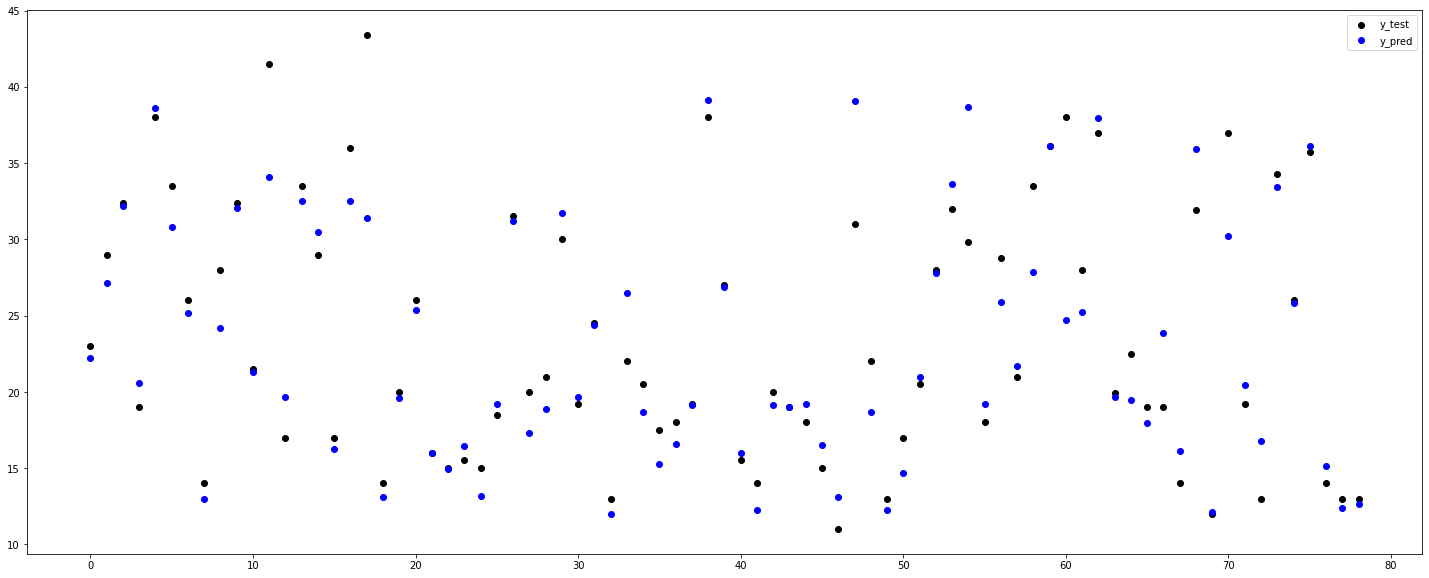

r2: 0.8485951139654284
MSE: 10.495731187880233
RMSE: 3.2397115902314875


In [120]:
# Create X values list and show fit!

showFit(x_values, y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print ("r2:", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print ("MSE:", mse)
print ("RMSE:", rmse)

## Symbolic Regression

### Main Idea: Use data to derive equations

As per Wikipedia, Symbolic Regression (SR) is a type of regression analysis that searches the space of mathematical expressions to find the model that best fits a given dataset, both in terms of accuracy and simplicity. 

Essentially, we are using basic mathematical operators to build more complex polynomial equations than just quadratic or cubic

Functions might include: addition, subraction, mutiplication, division, trigonometric functions, and exponentials.

In a symbolic regression optimization, it is important to discard a large formula if a smaller one with the same accuracy is encountered. This is necessary to avoid obviously redundant solutions like f(x)=x+1–1+0+0+0, and also to not settle for a huge polynomial with 100% accuracy.

Nice, because it provides and actaul governing equation for modeling. Thus, allowing more transparency than the popular black-box neural nets 

Example below with gplearn: https://gplearn.readthedocs.io/en/stable/index.html

In [121]:
import numpy as np
from gplearn.genetic import SymbolicRegressor
import matplotlib.pyplot as plt

### Create Sythetic Data

Equation:

![](eqn.png)

/var/folders/rz/09rsx9gn7_v672b_tqbwk_g80000gn/T/ipykernel_2512/2609589339.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure().gca(projection='3d')


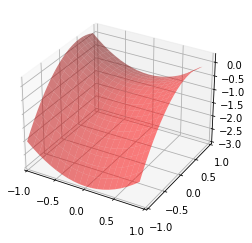

In [122]:
#This example demonstrates using gplearn's SymbolicRegressor to fit a symbolic relationship.

#Will start by creating some synthetic data that is based on the relationship y = Xo^2 - X1^2 + X1 - 1

x0 = np.arange(-1, 1, 1/10.)
x1 = np.arange(-1, 1, 1/10.)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1,
                       color='red', alpha=0.5)
plt.show()

In [123]:
from sklearn.utils.random import check_random_state

### Create Train and Test Set

In [124]:
# Now we will create some random training and test data that lies on this surface too:

rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

### Creating the Symbolic Regressor

In [125]:
# Create model and specify parameters

# Default is also set to: addition, subtraction, multiplication and division
# This should work in our case

est_gp = SymbolicRegressor(population_size=5000, #the number of programs in each generation
                           generations=20, 
                           stopping_criteria=0.01, #The required metric value required in order to stop evolution early.
                           p_crossover=0.7, 
                           p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, 
                           p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, 
                           random_state=0)

# Train our model

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          458.578        5         0.320666         0.556764     36.65s
   1     9.97          1.70233        5         0.320202         0.624787     21.95s
   2     7.72          1.94456       11         0.239537         0.533148     20.07s
   3     5.41         0.990157        7         0.235676         0.719906     18.61s
   4     4.66         0.894443       11         0.103946         0.103946     16.98s
   5     5.41         0.940242       11         0.060802         0.060802     15.93s
   6     6.78          1.09536       11      0.000781474      0.000781474     15.51s


SymbolicRegressor(max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

### Generating an Equation from the Data

In [126]:
# Printing Symbolic Result!!!

print(est_gp._program)

sub(add(-0.999, X1), mul(sub(X1, X0), add(X0, X1)))


![](red.png)